In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df_ipl = pd.read_csv("IPL_data.csv")

In [3]:
df_ipl.head(10)

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000
5,6,"Bailey, GJ",2,AUS,CSK,Batsman,0,0,172,72.26,...,95.45,0,0,0,0.00,0.00,0.00,2009,50000,50000
6,7,"Balaji, L",2,IND,CSK+,Bowler,51,27,120,78.94,...,72.22,1,1342,52,25.81,7.98,19.40,2011,100000,500000
7,8,"Bollinger, DE",2,AUS,CSK,Bowler,54,50,50,92.59,...,165.88,1,693,37,18.73,7.22,15.57,2011,200000,700000
8,9,"Botha, J",2,SA,RR,Allrounder,83,17,609,85.77,...,114.73,3,610,19,32.11,6.85,28.11,2011,200000,950000
9,10,"Boucher, MV",2,SA,RCB+,W. Keeper,5515,1,4686,84.76,...,127.51,13,0,0,0.00,0.00,0.00,2008,200000,450000


In [4]:
df_ipl["TEAM"] = df_ipl["TEAM"].replace(["CSK+", "RCB+", 'DC+', 'RR+', 'KXIP+', 'KXI+', 'MI+', 'KKR+'], ["CSK", "RCB", 'DC', 'RR', 'KXIP', 'KXI', 'MI', 'KKR'])

In [5]:
df_ipl["TEAM"].unique()

array(['KXIP', 'RCB', 'KKR', 'CSK', 'RR', 'MI', 'DD+', 'DC', 'KXI', 'DD'],
      dtype=object)

In [8]:
df_ipl.columns

Index(['PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE', 'T-RUNS',
       'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [7]:
df_ipl.drop("Sl.NO.", inplace=True, axis=1)

In [9]:
df_ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PLAYER NAME    130 non-null    object 
 1   AGE            130 non-null    int64  
 2   COUNTRY        130 non-null    object 
 3   TEAM           130 non-null    object 
 4   PLAYING ROLE   130 non-null    object 
 5   T-RUNS         130 non-null    int64  
 6   T-WKTS         130 non-null    int64  
 7   ODI-RUNS-S     130 non-null    int64  
 8   ODI-SR-B       130 non-null    float64
 9   ODI-WKTS       130 non-null    int64  
 10  ODI-SR-BL      130 non-null    float64
 11  CAPTAINCY EXP  130 non-null    int64  
 12  RUNS-S         130 non-null    int64  
 13  HS             130 non-null    int64  
 14  AVE            130 non-null    float64
 15  SR-B           130 non-null    float64
 16  SIXERS         130 non-null    int64  
 17  RUNS-C         130 non-null    int64  
 18  WKTS      

In [10]:
df_ipl.duplicated().sum()

0

In [12]:
df_ipl.isnull().sum()

PLAYER NAME      0
AGE              0
COUNTRY          0
TEAM             0
PLAYING ROLE     0
T-RUNS           0
T-WKTS           0
ODI-RUNS-S       0
ODI-SR-B         0
ODI-WKTS         0
ODI-SR-BL        0
CAPTAINCY EXP    0
RUNS-S           0
HS               0
AVE              0
SR-B             0
SIXERS           0
RUNS-C           0
WKTS             0
AVE-BL           0
ECON             0
SR-BL            0
AUCTION YEAR     0
BASE PRICE       0
SOLD PRICE       0
dtype: int64

In [40]:
df_ipl["PLAYING ROLE"].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [41]:
df_Bat = df_ipl.where(df_ipl["PLAYING ROLE"]== "Batsman")
df_All = df_ipl.where(df_ipl["PLAYING ROLE"]== "Allrounder")
df_Bow = df_ipl.where(df_ipl["PLAYING ROLE"]== "Bowler")
df_Wkt = df_ipl.where(df_ipl["PLAYING ROLE"]== "W. Keeper")

In [42]:
df_Bat.dropna(inplace=True)
df_All.dropna(inplace=True)
df_Bow.dropna(inplace=True)
df_Wkt.dropna(inplace=True)

In [43]:
df_All.sort_values("SOLD PRICE", ascending=False).head(5)

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,24.0,"Flintoff, A",2.0,ENG,CSK,Allrounder,3845.0,226.0,3394.0,88.82,...,116.98,2.0,105.0,2.0,52.50,9.55,33.00,2009.0,950000.0,1550000.0
108,109.0,"Symonds, A",3.0,AUS,DC,Allrounder,1462.0,24.0,5088.0,92.44,...,129.87,41.0,674.0,20.0,33.70,7.70,26.35,2008.0,250000.0,1350000.0
41,42.0,"Jayasuriya, ST",3.0,SL,MI,Allrounder,6973.0,98.0,13430.0,91.21,...,144.36,39.0,390.0,13.0,30.00,7.96,22.62,2008.0,250000.0,975000.0
59,60.0,"Mathews, AD",1.0,SL,KKR,Allrounder,1219.0,7.0,1447.0,82.59,...,123.28,12.0,537.0,15.0,35.80,8.20,26.33,2011.0,300000.0,950000.0
39,40.0,"Jadeja, RA",1.0,IND,RR,Allrounder,0.0,0.0,860.0,78.61,...,120.86,35.0,750.0,26.0,28.85,7.33,23.65,2011.0,100000.0,950000.0


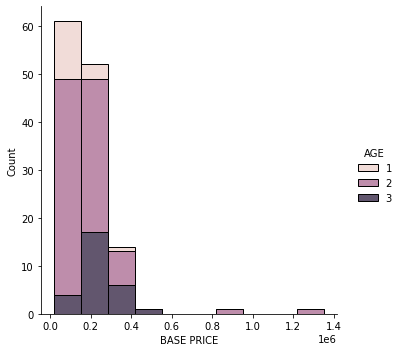

In [44]:
sns.displot(df_ipl, x="BASE PRICE", hue="AGE", multiple="stack", bins=10)

In [45]:
print("Minimum Base Price: ",df_ipl["BASE PRICE"].min())
print("Maximum Base Price: ",df_ipl["BASE PRICE"].max())
print("Minimum Sold Price: ",df_ipl["SOLD PRICE"].min())
print("Maximum Sold Price: ",df_ipl["SOLD PRICE"].max())

Minimum Base Price:  20000
Maximum Base Price:  1350000
Minimum Sold Price:  20000
Maximum Sold Price:  1800000


-X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X-


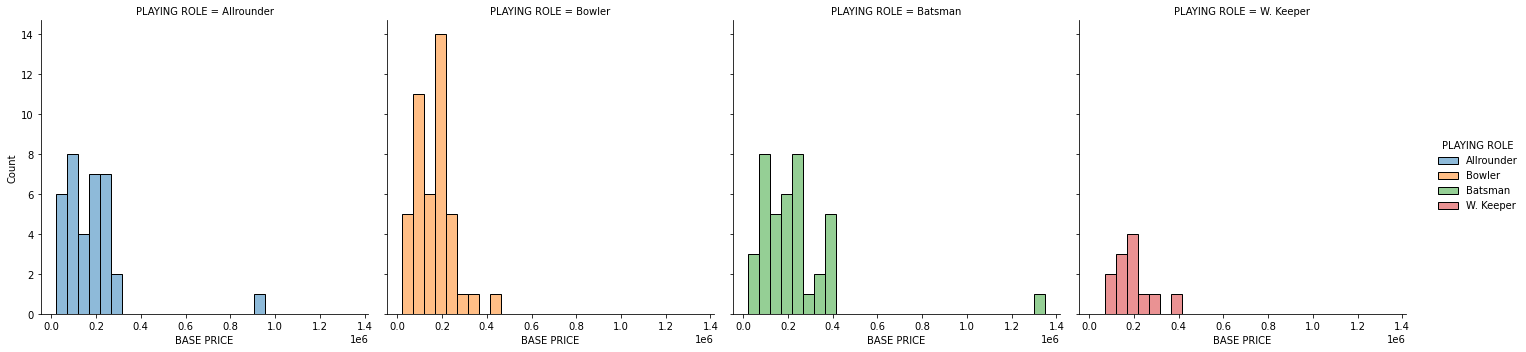

-X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X-

						Base Prices:

Minimum Base Price: 20000						Maximum Base Price: 1350000
Minimum Base Price of Allrounder: 20000.0				Maximum Base Price of Allrounder: 950000.0
Minimum Base Price of Batsman: 20000.0					Maximum Base Price of Batsman: 1350000.0
Minimum Base Price of Bowler: 20000.0					Maximum Base Price of Bowler: 450000.0
Minimum Base Price of Wicket Keeper: 100000.0				Maximum Base Price of Wicket Keeper: 400000.0
-X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X-


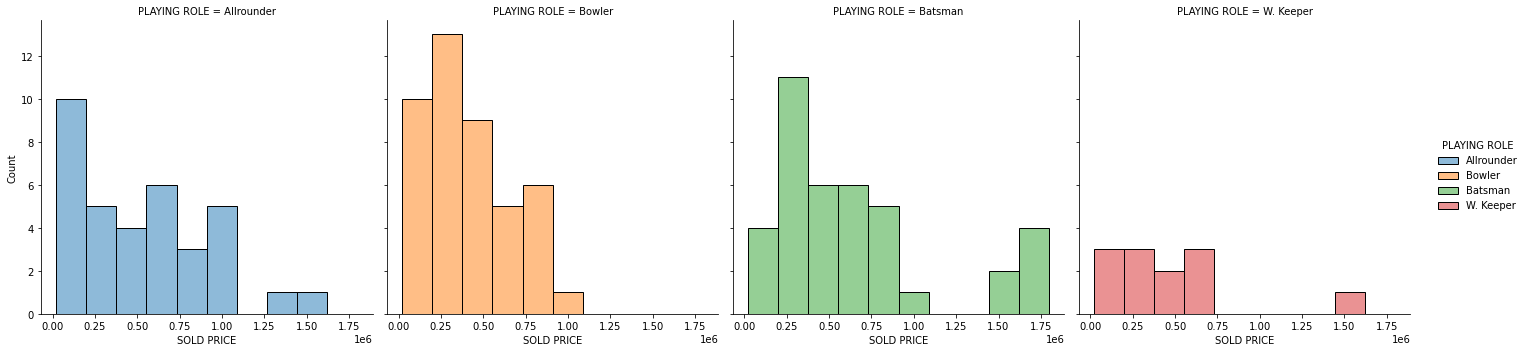

-X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X-

						Sold Prices:

Minimum Sold Price: 20000						Maximum Sold Price: 1800000
Minimum Sold Price of Allrounder: 20000.0				Maximum Sold Price of Allrounder: 1550000.0
Minimum Sold Price of Batsman: 50000.0					Maximum Sold Price of Batsman: 1800000.0
Minimum Sold Price of Bowler: 24000.0					Maximum Sold Price of Bowler: 950000.0
Minimum Sold Price of Wicket Keeper: 100000.0				Maximum Sold Price of Wicket Keeper: 1500000.0
-X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X-


In [100]:
print("-X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X-")
sns.displot(df_ipl, x="BASE PRICE", hue="PLAYING ROLE", col="PLAYING ROLE")
plt.show()
print("-X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X-")
print("\n\t\t\t\t\t\tBase Prices:\n")
print("Minimum Base Price: {}\t\t\t\t\t\tMaximum Base Price: {}".format(df_ipl["BASE PRICE"].min(), df_ipl["BASE PRICE"].max()))
print("Minimum Base Price of Allrounder: {}\t\t\t\tMaximum Base Price of Allrounder: {}".format(df_All["BASE PRICE"].min(), df_All["BASE PRICE"].max()))
print("Minimum Base Price of Batsman: {}\t\t\t\t\tMaximum Base Price of Batsman: {}".format(df_Bat["BASE PRICE"].min(),df_Bat["BASE PRICE"].max()))
print("Minimum Base Price of Bowler: {}\t\t\t\t\tMaximum Base Price of Bowler: {}".format(df_Bow["BASE PRICE"].min(),df_Bow["BASE PRICE"].max()))
print("Minimum Base Price of Wicket Keeper: {}\t\t\t\tMaximum Base Price of Wicket Keeper: {}".format(df_Wkt["BASE PRICE"].min(),df_Wkt["BASE PRICE"].max()))
print("-X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X-")
sns.displot(df_ipl, x="SOLD PRICE", hue="PLAYING ROLE", col="PLAYING ROLE")
plt.show()
print("-X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X-")
print("\n\t\t\t\t\t\tSold Prices:\n")
print("Minimum Sold Price: {}\t\t\t\t\t\tMaximum Sold Price: {}".format(df_ipl["SOLD PRICE"].min(), df_ipl["SOLD PRICE"].max()))
print("Minimum Sold Price of Allrounder: {}\t\t\t\tMaximum Sold Price of Allrounder: {}".format(df_All["SOLD PRICE"].min(), df_All["SOLD PRICE"].max()))
print("Minimum Sold Price of Batsman: {}\t\t\t\t\tMaximum Sold Price of Batsman: {}".format(df_Bat["SOLD PRICE"].min(),df_Bat["SOLD PRICE"].max()))
print("Minimum Sold Price of Bowler: {}\t\t\t\t\tMaximum Sold Price of Bowler: {}".format(df_Bow["SOLD PRICE"].min(),df_Bow["SOLD PRICE"].max()))
print("Minimum Sold Price of Wicket Keeper: {}\t\t\t\tMaximum Sold Price of Wicket Keeper: {}".format(df_Wkt["SOLD PRICE"].min(),df_Wkt["SOLD PRICE"].max()))
print("-X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X-")

## The above Graphs represents the various base price set for players with different roles and their sold price

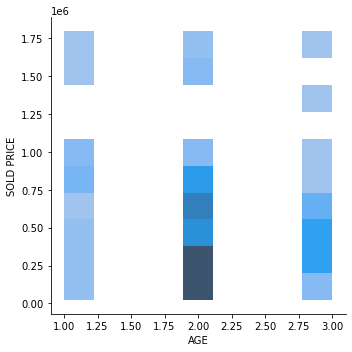

In [112]:
sns.displot(df_ipl, x="AGE",y="SOLD PRICE")

{'whiskers': [<matplotlib.lines.Line2D at 0x18e9ac87d30>,
 'caps': [<matplotlib.lines.Line2D at 0x18e9ac953d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18e9ac87a60>],
 'medians': [<matplotlib.lines.Line2D at 0x18e9ac958b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18e9ac95b80>],
 'means': []}

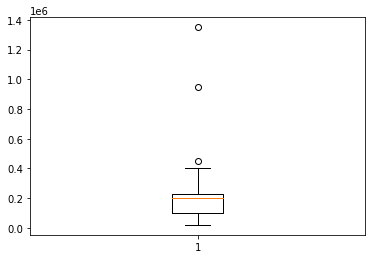

In [116]:
plt.boxplot(x="BASE PRICE", data=df_ipl)